In [1]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2


"""Download the images from the following link and place it in your current working directory with the filename test2.jpg & test1.jpg

https://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg

https://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg
"""

'Download the images from the following link and place it in your current working directory with the filename test2.jpg & test1.jpg\n\nhttps://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg\n\nhttps://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg\n'

In [5]:
# face detection with mtcnn on a photograph
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

1/1 [==============================] - 0s 158ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


1/1 [==============================] - 0s 186ms/step


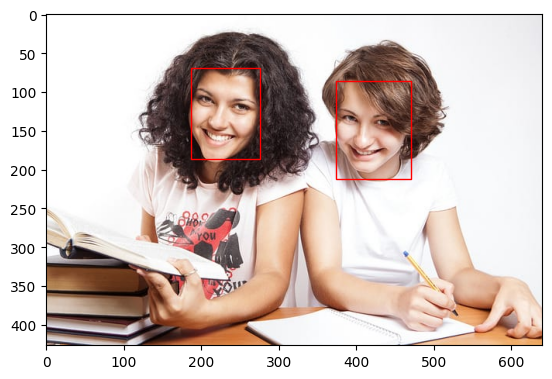

In [7]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)



1/1 [==============================] - 0s 217ms/step


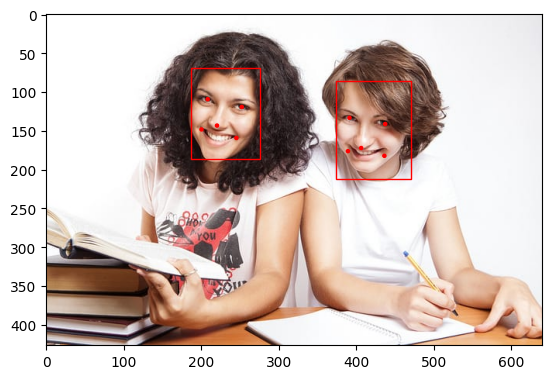

In [8]:
"""You can draw a circle via the Circle class for the eyes, nose, and mouth."""

 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

3/3 [==============================] - 0s 21ms/step


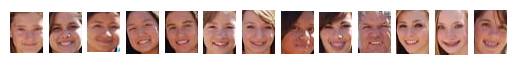

In [9]:


"""You can now try face detection on the test2.jpg photograph.

You may want to extract the detected faces and pass them as input to another system. This can be achieved by extracting the pixel data directly out of the photograph; We can demonstrate this by extracting each face and plotting them as separate subplots. You could just as easily save them to file. The draw_faces() below extracts and plots each detected face in a photograph.
"""
 
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)


### Assignment 1: Detect faces from live images taken from webcam.

In [12]:

# initialize MTCNN detector
detector = MTCNN()

# start capturing video from default webcam
video_capture = cv2.VideoCapture(0)

while True:
    # capture frame-by-frame
    ret, frame = video_capture.read()

    # detect faces in the frame using MTCNN
    faces = detector.detect_faces(frame)

    # mark faces with bounding boxes
    for face in faces:
        # get coordinates of the box surrounding the face
        x, y, w, h = face['box']
        # draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # display the resulting image
    cv2.imshow('Video', frame)

    # exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object and close all windows
video_capture.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 35ms/step


### Assignment 2: Once you're done with images, then take short live video sequence and detect faces.


In [15]:
# open video capture
cap = cv2.VideoCapture(0)

# define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('input_video.mp4', fourcc, 20.0, (640, 480))

# loop through video frames
while True:
    # capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        frame = cv2.flip(frame, 1)

        # write the frame to output video
        out.write(frame)

        # display the resulting frame
        cv2.imshow('frame', frame)

    # press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


In [16]:
# initialize MTCNN detector
detector = MTCNN()

# start capturing video from input file
video_capture = cv2.VideoCapture("input_video.mp4")

# get video dimensions
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))

# create output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter("output_video.mp4", fourcc, 30, (frame_width, frame_height))

while True:
    # capture frame-by-frame
    ret, frame = video_capture.read()

    # break loop if end of video
    if not ret:
        break

    # detect faces in the frame using MTCNN
    faces = detector.detect_faces(frame)

    # mark faces with bounding boxes
    for face in faces:
        # get coordinates of the box surrounding the face
        x, y, w, h = face['box']
        # draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # write marked frame to output video
    output_video.write(frame)

    # display the resulting image
    cv2.imshow('Video', frame)

    # exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object, output video writer, and close all windows
video_capture.release()
output_video.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step


### Assignment 3: Detect faces in mask wearing images. 


In [ ]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape		
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'mask.jpeg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)
